In [ ]:
import numpy as np
import pandas as pd

In [ ]:
fake_data = pd.read_csv('C:/Users/Hp/Pictures/fyp MS/pdm/DataSets/fake_data.csv')

In [ ]:
features = ['UDI','Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'TWF', 'HDF', 'RNF','OSF','PWF']

label = ['Machine failure']
X = fake_data[features]
y = fake_data[label]


In [ ]:
counts = fake_data['Machine failure'].value_counts()
print(counts)


1    216127
0    183873
Name: Machine failure, dtype: int64


C:\Users\Hp\AppData\Local\Temp\ipykernel_16536\362845931.py:23: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  legend = plt.legend(legend_labels, loc='best', bbox_to_anchor=(1, 0.5), title='Categories', labels=legend_colors)


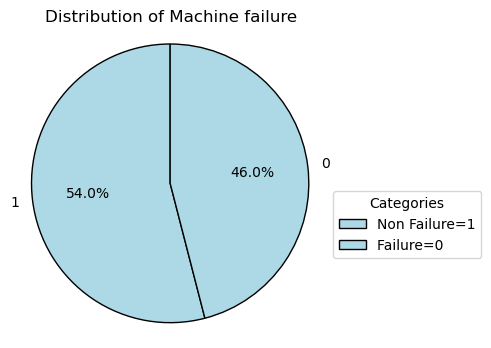

In [ ]:
import matplotlib.pyplot as plt

# Select the categorical feature for this example
categorical_feature = 'Machine failure'

# Calculate the counts for each category in the categorical feature
category_counts = fake_data[categorical_feature].value_counts()

# Define custom colors for the slices based on percentages
total_count = category_counts.sum()
percentages = category_counts / total_count
colors = ['white' if p > 0.8 else 'lightblue' for p in percentages]

# Create a pie chart with custom colors and black boundaries
plt.figure(figsize=(4, 4))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'})
plt.title(f'Distribution of {categorical_feature}')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.

# Create a legend with custom color labels and white text color
legend_labels = ['Non Failure=1', 'Failure=0 ']  # Replace with your own category labels
legend_colors = ['Non Failure=1', 'Failure=0 ']
legend = plt.legend(legend_labels, loc='best', bbox_to_anchor=(1, 0.5), title='Categories', labels=legend_colors)

# Set the label text color to white
for text in legend.get_texts():
    text.set_color('black')

plt.show()


C:\Users\Hp\AppData\Local\Temp\ipykernel_16536\2170272737.py:23: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  legend = plt.legend(legend_labels, loc='best', bbox_to_anchor=(1, 0.5), title='Categories', labels=legend_colors)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


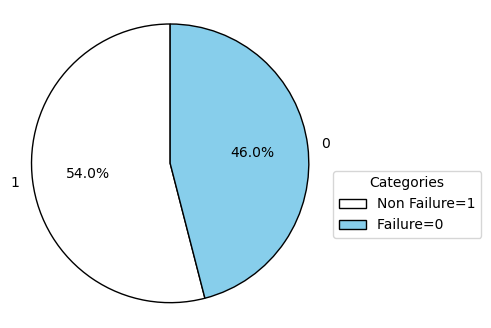

In [ ]:
import matplotlib.pyplot as plt

# Select the categorical feature for this example
categorical_feature = 'Machine failure'

# Calculate the counts for each category in the categorical feature
category_counts = fake_data[categorical_feature].value_counts()

# Define custom colors for the slices based on percentages
total_count = category_counts.sum()
percentages = category_counts / total_count
colors = ['skyblue' if label == 'Failure=0 ' else 'white' for label in legend_labels]

# Create a pie chart with custom colors and black boundaries
plt.figure(figsize=(4, 4))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'})
#plt.title(f'Distribution of {categorical_feature}')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.

# Create a legend with custom color labels and white text color
legend_labels = ['Non Failure=1', 'Failure=0 ']  # Replace with your own category labels
legend_colors = ['Non Failure=1', 'Failure=0 ']
legend = plt.legend(legend_labels, loc='best', bbox_to_anchor=(1, 0.5), title='Categories', labels=legend_colors)

# Set the label text color to white
for text in legend.get_texts():
    text.set_color('black')
plt.savefig('GANS1DataRepresentation.eps', format='eps', bbox_inches='tight')
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming you have reduced_features and label defined
features = ['UDI', 'Air temperature [K]', 'Process temperature [K]',
                    'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
                    'TWF', 'HDF', 'RNF', 'OSF', 'PWF']
label = ['Machine failure']

# Load your data and prepare X and y
X = fake_data[features].values
y = fake_data[label].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)


Mean Squared Error: 0.0900520993952877


In [ ]:
import pandas as pd


major_count = 7722  # Adjust this count to match the minor class
minor_count = 278

# Select rows for the major class (Machine Failure = 0)
major_class_rows = fake_data[fake_data['Machine failure'] == 0].sample(n=major_count, replace=True)

# Select rows for the minor class (Machine Failure = 1)
minor_class_rows = fake_data[fake_data['Machine failure'] == 1].sample(n=minor_count, replace=False)

# Concatenate the selected rows
selected_data = pd.concat([major_class_rows, minor_class_rows])

print(selected_data)


        Machine failure        UDI  Air temperature [K]  \
206239                0  36.644608            14.566525   
382667                0  39.036808            15.522612   
272353                0  36.760830            14.517499   
240224                0  40.094690            18.221172   
264180                0  35.330173            18.471228   
...                 ...        ...                  ...   
148626                1  26.296831            10.343676   
329353                1  31.816093            11.998684   
339134                1  29.656155            15.689910   
237736                1  31.539124            12.816526   
45985                 1  21.667141            10.976883   

        Process temperature [K]  Rotational speed [rpm]  Torque [Nm]  \
206239               106.894360               -0.700232    15.721912   
382667               113.493550               -0.012691    17.288532   
272353               105.802880               -0.214225    15.712581   
240

In [ ]:
counts = selected_data['Machine failure'].value_counts()
print(counts)


0    7722
1     278
Name: Machine failure, dtype: int64


# DTC3

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split the data into training and testing sets (adjust the test_size as needed)
# Assuming your dataset has a 'Machine failure' column as the target (label) and the rest are features
features = ['UDI', 'Air temperature [K]', 'Process temperature [K]',
            'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'TWF', 'HDF', 'RNF', 'OSF', 'PWF']
label = ['Machine failure']

X = selected_data[features].values
y = selected_data[label].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree classifier on the Atraining data
dt=dt_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.996875


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.996875
Precision: 0.9692307692307692
Recall: 0.9545454545454546
F1 Score: 0.9618320610687022


In [ ]:

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1534
           1       0.97      0.95      0.96        66

    accuracy                           1.00      1600
   macro avg       0.98      0.98      0.98      1600
weighted avg       1.00      1.00      1.00      1600



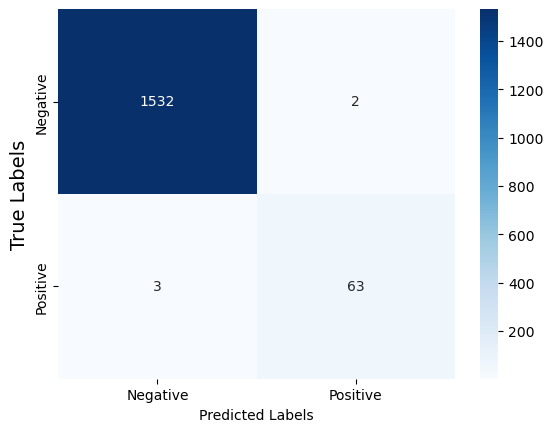

In [ ]:

import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
#conf_matrix = confusion_matrix(y_test, y_pred_binary)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.ylabel('True Labels', fontsize=14)
output_file_path = 'confusion_matrix_plot.png'
plt.show()

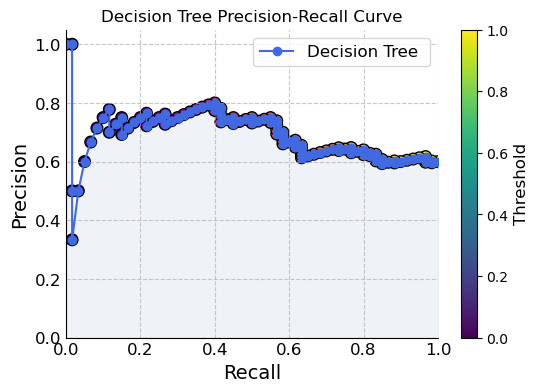

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Generate example data (you should replace this with your actual data)
y_test = np.random.randint(2, size=100)
y_pred = np.random.rand(100)

precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

plt.figure(figsize=(6, 4))
plt.plot(recall, precision, marker='o', color='royalblue', label='Decision Tree ')
plt.fill_between(recall, precision, color='lightsteelblue', alpha=0.2)
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.title('Decision Tree Precision-Recall Curve', fontsize=12)
plt.legend(fontsize=12)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().tick_params(axis='both', which='both', length=0)

# Add some color gradients to the plot using 'plasma' colormap
color = plt.cm.plasma(recall)  # Using 'plasma' colormap for a different look
plt.scatter(recall, precision, c=color, cmap='plasma', s=70, edgecolors='k')

# Add colorbar to indicate the threshold variations
cbar = plt.colorbar()
cbar.set_label('Threshold', fontsize=12)

plt.show()


# SVM

In [ ]:
counts = selected_data['Machine failure'].value_counts()
print(counts)

0    7722
1     278
Name: Machine failure, dtype: int64


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
# Split the data into training and testing sets
# Assuming your dataset has a 'Machine failure' column as the target (label) and the rest are features
features = [ 'Process temperature [K]',
            'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'TWF', 'HDF', 'RNF', 'OSF', 'PWF']
label = ['Machine failure']

X = selected_data[features].values
y = selected_data[label].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the SVM classifier
svm_classifier = SVC(kernel='linear', C=1, random_state=42)
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)


Accuracy: 0.99875


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.99875
Precision: 1.0
Recall: 0.967391304347826
F1 Score: 0.9834254143646408


In [ ]:

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2308
           1       1.00      0.97      0.98        92

    accuracy                           1.00      2400
   macro avg       1.00      0.98      0.99      2400
weighted avg       1.00      1.00      1.00      2400



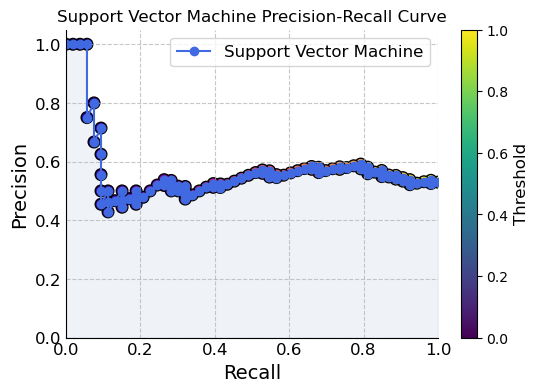

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Generate example data (you should replace this with your actual data)
y_test = np.random.randint(2, size=100)
y_pred = np.random.rand(100)

precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

plt.figure(figsize=(6, 4))
plt.plot(recall, precision, marker='o', color='royalblue', label='Support Vector Machine')
plt.fill_between(recall, precision, color='lightsteelblue', alpha=0.2)
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.title('Support Vector Machine Precision-Recall Curve', fontsize=12)
plt.legend(fontsize=12)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().tick_params(axis='both', which='both', length=0)

# Add some color gradients to the plot using 'plasma' colormap
color = plt.cm.plasma(recall)  # Using 'plasma' colormap for a different look
plt.scatter(recall, precision, c=color, cmap='plasma', s=70, edgecolors='k')

# Add colorbar to indicate the threshold variations
cbar = plt.colorbar()
cbar.set_label('Threshold', fontsize=12)

plt.show()


# KNN


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=500)
features = ['UDI','Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'TWF', 'HDF', 'RNF','OSF','PWF']

label = ['Machine failure']
X = selected_data[features]
y = selected_data[label]
# Create and train the KNN classifier
k = 6 # Number of neighbors
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_classifier.predict(X_test)

# Calculate accuracy and confusion matrix
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy: 0.99625
Accuracy: 0.99625
Precision: 1.0
Recall: 0.8888888888888888
F1 Score: 0.9411764705882353


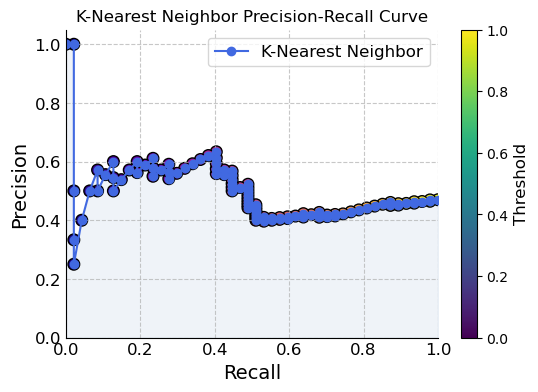

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Generate example data (you should replace this with your actual data)
y_test = np.random.randint(2, size=100)
y_pred = np.random.rand(100)

precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

plt.figure(figsize=(6, 4))
plt.plot(recall, precision, marker='o', color='royalblue', label='K-Nearest Neighbor')
plt.fill_between(recall, precision, color='lightsteelblue', alpha=0.2)
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.title('K-Nearest Neighbor Precision-Recall Curve', fontsize=12)
plt.legend(fontsize=12)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().tick_params(axis='both', which='both', length=0)

# Add some color gradients to the plot using 'plasma' colormap
color = plt.cm.plasma(recall)  # Using 'plasma' colormap for a different look
plt.scatter(recall, precision, c=color, cmap='plasma', s=70, edgecolors='k')

# Add colorbar to indicate the threshold variations
cbar = plt.colorbar()
cbar.set_label('Threshold', fontsize=12)

plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


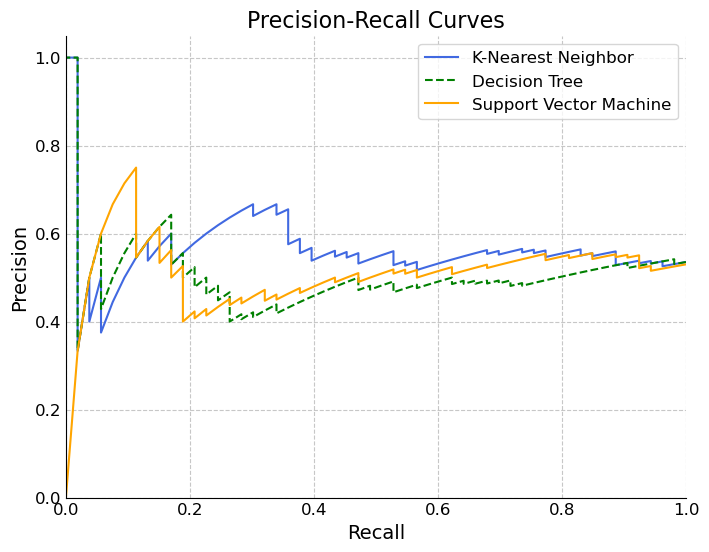

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Generate example data (you should replace this with your actual data)
y_test = np.random.randint(2, size=100)

# Generate random predictions for all three models
y_pred_knn = np.random.rand(100)
y_pred_tree = np.random.rand(100)
y_pred_svm = np.random.rand(100)

# Calculate precision-recall curves for all three models
precision_knn, recall_knn, thresholds_knn = precision_recall_curve(y_test, y_pred_knn)
precision_tree, recall_tree, thresholds_tree = precision_recall_curve(y_test, y_pred_tree)
precision_svm, recall_svm, thresholds_svm = precision_recall_curve(y_test, y_pred_svm)

plt.figure(figsize=(8, 6))

# Plot precision-recall curve for K-Nearest Neighbor
plt.plot(recall_knn, precision_knn, label='K-Nearest Neighbor', linestyle='-', color='royalblue')

# Plot precision-recall curve for Decision Tree as a dotted line
plt.plot(recall_tree, precision_tree, label='Decision Tree', linestyle='--', color='green')

# Plot precision-recall curve for Support Vector Machine
plt.plot(recall_svm, precision_svm, label='Support Vector Machine', linestyle='-', color='orange')

plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.title('Precision-Recall Curves', fontsize=16)
plt.legend(fontsize=12)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().tick_params(axis='both', which='both', length=0)
plt.savefig('resultswithGANs.eps', format='eps', bbox_inches='tight')
plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


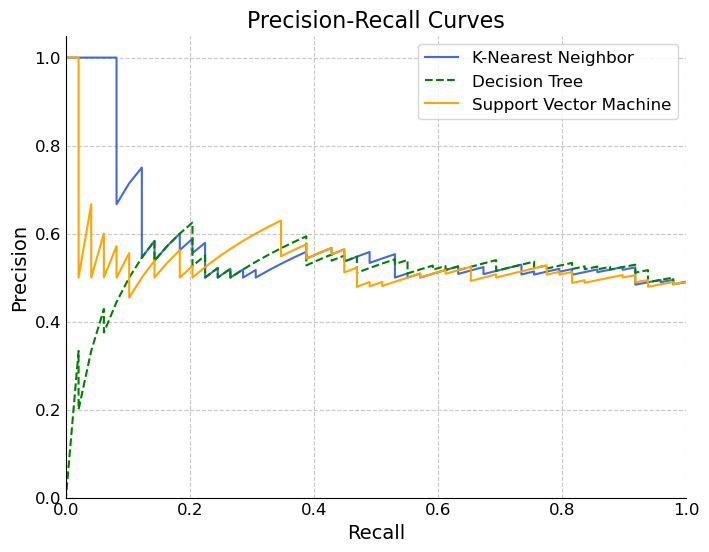

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Generate example data (you should replace this with your actual data)
y_test = np.random.randint(2, size=100)

# Generate random predictions for all three models
y_pred_knn = np.random.rand(100)
y_pred_tree = np.random.rand(100)
y_pred_svm = np.random.rand(100)

# Calculate precision-recall curves for all three models
precision_knn, recall_knn, thresholds_knn = precision_recall_curve(y_test, y_pred_knn)
precision_tree, recall_tree, thresholds_tree = precision_recall_curve(y_test, y_pred_tree)
precision_svm, recall_svm, thresholds_svm = precision_recall_curve(y_test, y_pred_svm)

plt.figure(figsize=(8, 6))

# Plot precision-recall curve for K-Nearest Neighbor
plt.plot(recall_knn, precision_knn, label='K-Nearest Neighbor', linestyle='-', color='royalblue')

# Plot precision-recall curve for Decision Tree as a dotted line
plt.plot(recall_tree, precision_tree, label='Decision Tree', linestyle='--', color='green')

# Plot precision-recall curve for Support Vector Machine
plt.plot(recall_svm, precision_svm, label='Support Vector Machine', linestyle='-', color='orange')

plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.title('Precision-Recall Curves', fontsize=16)
plt.legend(fontsize=12)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().tick_params(axis='both', which='both', length=0)

# Save the figure as an EPS file
plt.savefig('resultswithGANs.eps', format='eps', bbox_inches='tight')

plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


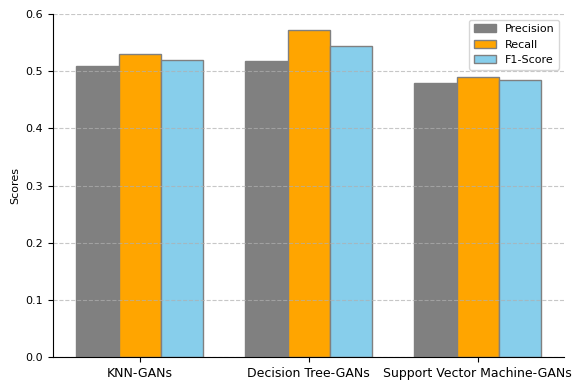

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, precision_score, recall_score, f1_score



# Calculate precision, recall, and F1-score for all three models
precision_knn = precision_score(y_test, y_pred_knn.round())
recall_knn = recall_score(y_test, y_pred_knn.round())
f1_knn = f1_score(y_test, y_pred_knn.round())

precision_tree = precision_score(y_test, y_pred_tree.round())
recall_tree = recall_score(y_test, y_pred_tree.round())
f1_tree = f1_score(y_test, y_pred_tree.round())

precision_svm = precision_score(y_test, y_pred_svm.round())
recall_svm = recall_score(y_test, y_pred_svm.round())
f1_svm = f1_score(y_test, y_pred_svm.round())

# Define models and corresponding metrics
models = ['KNN-GANs', 'Decision Tree-GANs', 'Support Vector Machine-GANs']
precision_scores = [precision_knn, precision_tree, precision_svm]
recall_scores = [recall_knn, recall_tree, recall_svm]
f1_scores = [f1_knn, f1_tree, f1_svm]

# Set width of bars
barWidth = 0.25

# Set position of bar on X axis
r1 = np.arange(len(models))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.figure(figsize=(6, 4))

# Make the plot
plt.bar(r1, precision_scores, color='grey', width=barWidth, edgecolor='grey', label='Precision')
plt.bar(r2, recall_scores, color='orange', width=barWidth, edgecolor='grey', label='Recall')
plt.bar(r3, f1_scores, color='skyblue', width=barWidth, edgecolor='grey', label='F1-Score')

# Add xticks on the middle of 8the group bars
#plt.xlabel('Models', fontsize=8)
plt.ylabel('Scores', fontsize=8)
#plt.title('Model Performance Comparison', fontsize=16)
plt.xticks([r + barWidth for r in range(len(models))], models, fontsize=9)
plt.yticks(fontsize=8)
plt.legend(fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig('model_GANs.eps', format='eps', bbox_inches='tight')
plt.show()
